In [1]:
# import modules, define some functions for loading, saving and processing a gene-barcode matrix
%matplotlib inline
import collections
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as sp_sparse
import h5py
from scipy import stats
import csv
from scipy import ndimage
from scipy import spatial


np.random.seed(0)

FeatureBCMatrix = collections.namedtuple('FeatureBCMatrix', ['feature_ids', 'feature_names', 'barcodes', 'matrix'])

def get_matrix_from_h5(filename):
    with h5py.File(filename) as f:
        if u'version' in f.attrs:
            if f.attrs['version'] > 2:
                raise ValueError('Matrix HDF5 file format version (%d) is an newer version that is not supported by this function.' % version)
        else:
            raise ValueError('Matrix HDF5 file format version (%d) is an older version that is not supported by this function.' % version)
        
        feature_ids = [x.decode('ascii', 'ignore') for x in f['matrix']['features']['id']]
        feature_names = np.asarray([x.decode('ascii', 'ignore') for x in f['matrix']['features']['name']])    
        barcodes = np.asarray(list(f['matrix']['barcodes'][:]))
        matrix = sp_sparse.csc_matrix((f['matrix']['data'], f['matrix']['indices'], f['matrix']['indptr']), shape=f['matrix']['shape'])
        return FeatureBCMatrix(feature_ids, feature_names, barcodes, matrix)

def get_expression(fbm, gene_name):
    try:
        gene_index = fbm.feature_names.index(gene_name)
    except ValueError:
        raise Exception("%s was not found in list of gene names." % gene_name)
    return fbm.matrix[gene_index, :].toarray().squeeze()
        
def subsample_matrix(gbm, barcode_indices):
    return FeatureBCMatrix(gbm.feature_ids, gbm.feature_names, gbm.barcodes[barcode_indices], gbm.matrix[:, barcode_indices])

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Graph based clusters


Text(0.5,1,'Graph-Based Clustering: RAW')

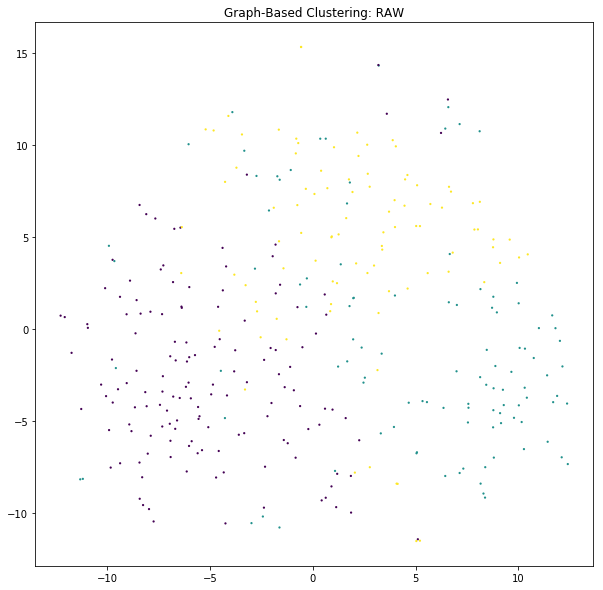

In [2]:
# Analyze all neurons clustered excluding FLARE genes (QC_excludegenes-FLARE.csv file)

folder='FLARE2'
project='Thy1L_Aggr'
dataset='Thy1L_Aggr'
params='_QC_neurons_FLARE_params_nacthresh2sd'
#savefolder='/media/storage/ckk/genomics/scripts/figs/NAc/'
savefolder='Z:/genomics/scripts/figs/NAc/'

#analysis_dir = '/media/storage/ckk/genomics/data/'+folder+'/reanalysis/'+project+'/'+dataset+params+'/outs/analysis/'
analysis_dir = 'Z:/genomics/data/'+folder+'/reanalysis/'+project+'/'+dataset+params+'/outs/analysis/'
tsne_file = analysis_dir+"tsne/2_components/projection.csv"

clusters_file = analysis_dir+'clustering/graphclust/clusters.csv'
diffexp_file = analysis_dir+'diffexp/graphclust/differential_expression.csv'
print('Graph based clusters')

# load TSNE and graph clustering
tsne = pd.read_csv(tsne_file)
clusters = pd.read_csv(clusters_file)

# plot all clusters in TSNE space
plt.figure(figsize=(10, 10))
plt.scatter(tsne['TSNE-1'], tsne['TSNE-2'], c=clusters['Cluster'], linewidths=0, s=5)
plt.title('Graph-Based Clustering: RAW')
#plt.savefig(savefolder+project+params+'_tsneclust.eps', format='eps', dpi=1000)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


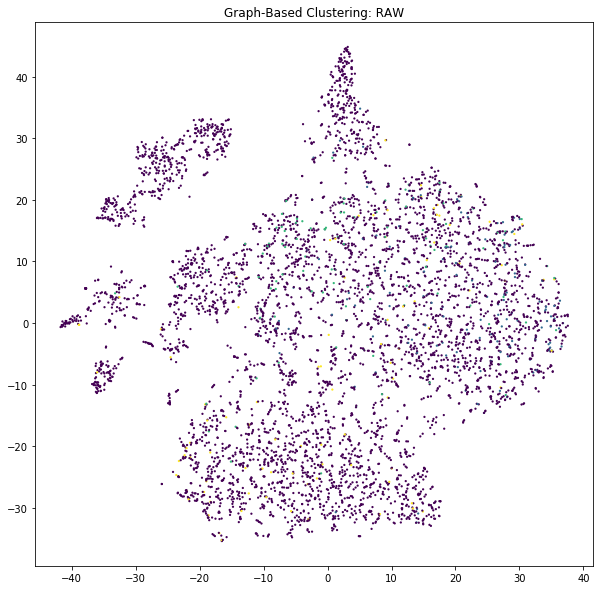

In [21]:
# plot cells according to all neuronal clusters


allneuronsparams='_QC_neurons_excludeFLARE_params'
#analysis_dir = '/media/storage/ckk/genomics/data/'+folder+'/reanalysis/'+project+'/'+dataset+params+'/outs/analysis/'
allneuronsanalysis_dir = 'Z:/genomics/data/'+folder+'/reanalysis/'+project+'/'+dataset+allneuronsparams+'/outs/analysis/'
allneuronstsne_file = allneuronsanalysis_dir+"tsne/2_components/projection.csv"

allneuronsclusters_file = allneuronsanalysis_dir+'clustering/kmeans_10_clusters/clusters.csv'

# load TSNE and graph clustering
allneuronstsne = pd.read_csv(allneuronstsne_file)
allneuronsclusters = pd.read_csv(allneuronsclusters_file)

allneuronsclusters['Cluster']=0

for x in range(0,len(clusters)):
    allneuronsclusters['Cluster'][allneuronsclusters['Barcode'].str.match(clusters['Barcode'][x])]=clusters['Cluster'][x]    


# plot all clusters in TSNE space
plt.figure(figsize=(10, 10))
plt.scatter(allneuronstsne['TSNE-1'], allneuronstsne['TSNE-2'], c=allneuronsclusters['Cluster'], linewidths=0, s=5)
plt.title('Graph-Based Clustering: RAW')
plt.savefig(savefolder+project+params+'_tsneclust_allneuronsmap.eps', format='eps', dpi=1000)



[[1. 1. 1. 1. 1. 2. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 5. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 2. 3. 1. 3. 3. 1. 2. 1. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1.
  1. 2. 1. 3. 1. 3. 3. 3. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 3. 3. 1. 1. 3. 1.
  1. 1. 3. 3. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 1. 3.
  2. 1. 1. 1. 1. 3. 1. 1. 1. 1. 2. 1. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3.
  1. 3. 1. 3. 3. 1. 2. 3. 1. 1.]]
[[ 2.  2.  2.  1.  2.  1.  2.  1.  1.  2.  2.  1.  2.  2.  2.  1.  2.  1.
   2.  1.  2.  1.  1.  1.  2.  1.  1.  1.  2.  1.  2.  1.  2.  2.  1.  2.
   1.  2.  2.  1.  1.  2.  2.  2.  3.  2.  2.  3.  2. 10.  1.  1.  2.  2.
   2.

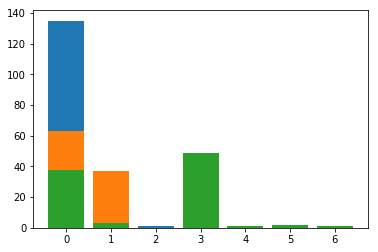

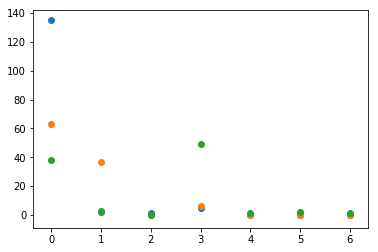

In [104]:
# Reload TSNE and graph clustering
allneuronstsne = pd.read_csv(allneuronstsne_file)
allneuronsclusters = pd.read_csv(allneuronsclusters_file)

clust_order = [1,3,5,2,7,9,10]
num_clust=len(clust_order)

Fclusters=np.empty([3,num_clust])
for x in range(0,3):
    currbarcodes=np.asarray(clusters['Barcode'][np.where(clusters['Cluster']==x+1)[0]])
    
    temp_clust=np.empty([1,len(currbarcodes)])
    for z in range(0,len(currbarcodes)):
        temp_clust[0,z]=np.asarray(allneuronsclusters['Cluster'][allneuronsclusters['Barcode'].str.match(currbarcodes[z])])        
    print(temp_clust)

    for y in range(0,num_clust):
        Fclusters[x,y]=len(np.where(temp_clust==clust_order[y])[0])
    
print(Fclusters)

plt.bar(range(0,7),Fclusters[0,:])
plt.bar(range(0,7),Fclusters[1,:])
plt.bar(range(0,7),Fclusters[2,:])
plt.savefig(savefolder+project+params+'_tsneclust_allneuronsbar.eps', format='eps', dpi=1000)

plt.figure()
plt.scatter(range(0,7),Fclusters[0,:])
plt.scatter(range(0,7),Fclusters[1,:])
plt.scatter(range(0,7),Fclusters[2,:])
plt.savefig(savefolder+project+params+'_tsneclust_allneuronsdot.eps', format='eps', dpi=1000)

In [3]:
#matrices_dir = "/media/storage/ckk/genomics/data/"+folder+"/counts/"+project+"/"+dataset+"/outs/"
matrices_dir = "Z:/genomics/data/"+folder+"/counts/"+project+"/"+dataset+"/outs/"
file_matrix_h5 = matrices_dir+"filtered_feature_bc_matrix.h5"

gene_bc_matrix = get_matrix_from_h5(file_matrix_h5)

In [4]:
#barcodes_dir = "/media/storage/ckk/genomics/data/"+folder+"/reanalysis/"+project+"/Barcodes/"
barcodes_dir = "Z:/genomics/data/"+folder+"/reanalysis/"+project+"/Barcodes/"
barcodes_file=barcodes_dir+dataset+"_QC_neurons_FLARE_nac2sd_barcodes.csv"

In [5]:
QCcell_barcodes=np.array([])    
with open(barcodes_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        QCcell_barcodes=np.append(QCcell_barcodes,row[0].encode('UTF-8'))
csv_file.close()
QCcell_barcodes=QCcell_barcodes[1:]

QC_cells=np.array([])
for x in range(0,len(QCcell_barcodes)):
    curr_barcodes=int(np.where(gene_bc_matrix.barcodes==QCcell_barcodes[x])[0])
    QC_cells=np.append(QC_cells,curr_barcodes)
QC_cells=QC_cells.astype(int)

print('Number of cells:',np.shape(QC_cells))

Number of cells: (343,)


In [ ]:
subset_matrix=subsample_matrix(gene_bc_matrix, QC_cells)

# Normalize matrix
subset_matrix_exp = subset_matrix.matrix.toarray().squeeze()
        
# Calculate total and median UMI counts per cell and normalize
total_umicounts_per_cell = np.sum(subset_matrix_exp, axis=0)
median_umicount_across_cells = np.median(total_umicounts_per_cell)
scale_factor = total_umicounts_per_cell/median_umicount_across_cells
subset_matrix_norm = subset_matrix_exp/scale_factor

# No normalization
#subset_matrix_norm = subset_matrix_exp

# Log transform data
#subset_matrix_norm = np.log2(subset_matrix_norm+1)

# Mean-center and scale variance per-gene
#mean_vals=np.nanmean(subset_matrix_norm,axis=1)
#mean_vals=np.reshape(mean_vals,(len(mean_vals),1))
#std_vals=np.nanstd(subset_matrix_norm,axis=1)
#std_vals=np.reshape(std_vals,(len(std_vals),1))
#subset_matrix_norm = (subset_matrix_norm - mean_vals)/std_vals

In [ ]:
barcodes = subset_matrix.barcodes
def splitGEMs(n): 
    return n[-1]

barcodes_last = np.asarray(list(map(splitGEMs, barcodes)))
group1=np.where(barcodes_last==49)[0]
group2=np.where(barcodes_last==50)[0]
group3=np.where(barcodes_last==51)[0]

groups=barcodes_last
groups[groups==49]=-1
groups[groups==50]=1
groups[groups==51]=0

# plot all clusters in TSNE space by group
plt.figure(figsize=(5, 5))
plt.scatter(tsne['TSNE-1'], tsne['TSNE-2'], c=groups, linewidths=0, s=5, vmin=-1, vmax=1)
plt.title('Graph-Based Clustering')
plt.savefig(savefolder+project+params+'_groups.eps', format='eps', dpi=1000)
plt.show()

print(len(group1))
print(len(group2))
print(len(group3))

In [ ]:
num_clusters=len(np.unique(clusters['Cluster']))
print(num_clusters)

all_clusters=np.unique(clusters['Cluster'])

clust_groups=np.empty([3,num_clusters])
for x in range(0,num_clusters):
    curr_clust=np.where(clusters['Cluster']==all_clusters[x])[0]
    total_clust=len(curr_clust)
    clust_groups[0,x]=len(np.where(np.isin(curr_clust,group1))[0])
    clust_groups[1,x]=len(np.where(np.isin(curr_clust,group2))[0])
    clust_groups[2,x]=len(np.where(np.isin(curr_clust,group3))[0])

plt.figure
plt.plot(np.arange(num_clusters)+1,clust_groups[0,:]/len(group1),'ok')
plt.plot(np.arange(num_clusters)+1,clust_groups[1,:]/len(group2),'or')
plt.plot(np.arange(num_clusters)+1,clust_groups[2,:]/len(group3),'og')
plt.ylabel('Percentage of cells in cluster')
plt.xlabel('Cluster number')
plt.ylim([0, 0.5])
#plt.savefig(savefolder+project+params+'_groups_clusters.eps', format='eps', dpi=300)
plt.show()

In [ ]:
# Identify top most differentiating genes per cluster
num_clusters=len(np.unique(clusters['Cluster']))

all_clusters=np.unique(clusters['Cluster'])

clust_order=np.arange(1,num_clusters+1)

# load TSNE and graph clustering
diffexp = pd.read_csv(diffexp_file)

diffgene_list=np.array([])
expression_matrix_perclust=np.empty([1,num_clusters])
for x in range(0,num_clusters):
#for x in clust_order:
    
    diffexp_sort=diffexp.sort_values(by=['Cluster '+str(all_clusters[x])+' Log2 fold change'],ascending=False)
    diffexp_nonzero=diffexp_sort[diffexp_sort['Cluster '+str(all_clusters[x])+' Mean Counts']>1]
    diffexp_sig=diffexp_nonzero[diffexp_nonzero['Cluster '+str(all_clusters[x])+' Adjusted p value']<0.1]
    currgenes=diffexp_sig.iloc[0,1]
    diffgene_list=np.append(diffgene_list,currgenes)
    print(all_clusters[x])
    print(currgenes)
    
expression_matrix_perclust=np.zeros([len(diffgene_list),num_clusters])
for x in range(0,len(diffgene_list)):
    curr_gene = np.where(subset_matrix.feature_names == diffgene_list[x])[0]  
    for y in range(0,num_clusters):    
        curr_clust=np.where(clusters['Cluster']==all_clusters[y])[0]
        currexpr = subset_matrix_norm[curr_gene,curr_clust] 
        expression_matrix_perclust[x,y]=np.mean(currexpr)
for x in range(0,len(diffgene_list)):
    expression_matrix_perclust[x,:]=stats.zscore(expression_matrix_perclust[x,:])
    
print(diffgene_list)
    
# Plot heatmap of gene expression
import seaborn as sns

sns.set()
custom_map=sns.diverging_palette(240,10, sep=40, as_cmap=True)

plt.figure
sns.heatmap(expression_matrix_perclust, cmap=custom_map, vmin=-2, vmax=2)
#plt.savefig(savefolder+project+params+'_topgene_heatmap.eps', format='eps', dpi=300)

In [ ]:
# Plot violinplots of control components across clusters

controlgene_list=np.array(["Gad2","tTA","TEV"])
num_ctrl=len(controlgene_list)
maxval=np.zeros((num_clusters,num_ctrl))
plt.figure
for y in range(0,num_ctrl):
    gene_index = np.where(subset_matrix.feature_names == controlgene_list[y])[0]
    gene_expr = subset_matrix_norm[gene_index,:]
    plt.subplot(num_ctrl,1,y+1)
    for x in range(0,num_clusters):
        curr_clust=np.where(clusters['Cluster']==clust_order[x])[0]
        currexpr = gene_expr[0,curr_clust]
        plt.violinplot(currexpr,[x],showextrema=False)
        maxval[x,y]=np.percentile(currexpr,98)
    plt.ylabel(controlgene_list[y])
    plt.xticks([])
    #plt.grid(False)

for y in range(0,num_ctrl):
    plt.subplot(num_ctrl,1,y+1)
    plt.ylim(0,np.max(maxval[:,y]))
    print(np.max(maxval[:,y]))
plt.xticks(np.arange(0,num_clusters),np.arange(1,num_clusters+1))
plt.xlabel('Cluster')        
#plt.savefig(savefolder+project+params+'_controlgenes_violinplots.eps', format='eps', dpi=1000)

In [ ]:
# Plot violinplots of sig diff genes across clusters

siggene_list=np.array(["mCherry","Calb1","Ptn","Tac1","Foxp2","Penk"])
num_sig=len(siggene_list)
maxval=np.zeros((num_clusters,num_sig))
plt.figure
for y in range(0,num_sig):
    gene_index = np.where(subset_matrix.feature_names == siggene_list[y])[0]
    gene_expr = subset_matrix_norm[gene_index,:]
    plt.subplot(num_sig,1,y+1)
    for x in range(0,num_clusters):
        curr_clust=np.where(clusters['Cluster']==clust_order[x])[0]
        currexpr = gene_expr[0,curr_clust]
        plt.violinplot(currexpr,[x],showextrema=False)
        maxval[x,y]=np.percentile(currexpr,96.5)
    plt.ylabel(siggene_list[y])
    plt.xticks([])
#print(num_sig)
#print(maxval)
        
for y in range(0,num_sig):
    plt.subplot(num_sig,1,y+1)
    plt.ylim(0,np.max(maxval[:,y]))
    print(maxval[:,y])
plt.xticks(np.arange(0,num_clusters),np.arange(1,num_clusters+1))
plt.xlabel('Cluster')
#plt.savefig(savefolder+project+params+'_siggenes_violinplots.eps', format='eps', dpi=1000)

In [ ]:
# Identify top most differentiating genes per cluster and plot heatmap
num_clusters=max(clusters['Cluster'])

clust_order = [1,2,3]

diffgenes=np.array(["Calb1","Ptn","Tac1","Foxp2","Penk"])
diffgene_list=np.array([])
for y in range(0,len(diffgenes)):
    curr_gene=np.where(subset_matrix.feature_names==diffgenes[y])[0]
    diffgene_list=np.append(diffgene_list,curr_gene).astype(int)

cell_list=np.array([])
#for x in range(0,num_clusters):
for x in clust_order:    
    curr_clust=np.where(clusters['Cluster']==x)[0]
    cell_list=np.append(cell_list,curr_clust).astype(int)

expression_matrix=subset_matrix_norm[:,cell_list]
expression_matrix=expression_matrix[diffgene_list,:]
corr_matrix=np.corrcoef(expression_matrix,rowvar=False)

print(np.shape(corr_matrix))
    
# Plot heatmap of gene expression
sns.set()
custom_map=sns.diverging_palette(240,10, sep=10, as_cmap=True)

plt.figure
sns.heatmap(corr_matrix, vmin=-1,vmax=1)

In [ ]:
curr_clust=np.where(clusters['Cluster']==1)[0]


Ptn_ind=np.where(subset_matrix.feature_names == 'Ptn')[0]
Ptn_expr=np.asarray(subset_matrix_norm[Ptn_ind,curr_clust])
#print((Ptn_expr))

Calb1_ind=np.where(subset_matrix.feature_names == 'Calb1')[0]
Calb1_expr=np.asarray(subset_matrix_norm[Calb1_ind,curr_clust])
#print(np.mean(Calb1_expr))

Tac1_ind=np.where(subset_matrix.feature_names == 'Tac1')[0]
Tac1_expr=np.asarray(subset_matrix_norm[Tac1_ind,curr_clust])
#print(np.mean(Tac1_expr))

mCherry_ind=np.where(subset_matrix.feature_names == 'mCherry')[0]
mCherry_expr=np.asarray(subset_matrix_norm[mCherry_ind,curr_clust])
#print(np.mean(mCherry_expr))

Foxp2_ind=np.where(subset_matrix.feature_names == 'Foxp2')[0]
Foxp2_expr=np.asarray(subset_matrix_norm[Foxp2_ind,curr_clust])
#print(np.mean(mCherry_expr))


In [ ]:
plt.figure
plt.scatter(Calb1_expr,Tac1_expr)
plt.show()

print(np.corrcoef(Tac1_expr,Ptn_expr))
print(np.corrcoef(Tac1_expr,Calb1_expr))
print(np.corrcoef(Ptn_expr,Calb1_expr))

diffgene_list=np.array(["mCherry","Calb1","Ptn","Tac1","Foxp2","Penk"])

In [ ]:
cell_order=np.argsort(Tac1_expr)

plt.figure()
plt.plot(range(0,len(cell_order)),Calb1_expr[cell_order]/np.max(Calb1_expr))
plt.plot(range(0,len(cell_order)),Tac1_expr[cell_order]/np.max(Tac1_expr))
plt.plot(range(0,len(cell_order)),Ptn_expr[cell_order]/np.max(Ptn_expr))
plt.legend(['Calb1','Tac1','Ptn'])
plt.savefig(savefolder+project+params+'_normexprscatter.eps', format='eps', dpi=300)

plt.figure()
plt.plot(range(0,len(cell_order)),Calb1_expr[cell_order]/np.max(Calb1_expr)+Ptn_expr[cell_order]/np.max(Ptn_expr))

In [ ]:
# Identify top most differentiating genes per cluster
num_clusters=len(np.unique(clusters['Cluster']))

all_clusters=np.unique(clusters['Cluster'])

clust_order=np.arange(1,num_clusters+1)

# load TSNE and graph clustering
diffexp = pd.read_csv(diffexp_file)

diffgene_list=np.array(["Calb1","Ptn","Tac1","Foxp2","Penk"])
expression_matrix_perclust=np.empty([1,num_clusters])
    
expression_matrix_perclust=np.zeros([len(diffgene_list),num_clusters])
for x in range(0,len(diffgene_list)):
    curr_gene = np.where(subset_matrix.feature_names == diffgene_list[x])[0]  
    for y in range(0,num_clusters):    
        curr_clust=np.where(clusters['Cluster']==all_clusters[y])[0]
        currexpr = subset_matrix_norm[curr_gene,curr_clust] 
        expression_matrix_perclust[x,y]=np.mean(currexpr)
for x in range(0,len(diffgene_list)):
    expression_matrix_perclust[x,:]=stats.zscore(expression_matrix_perclust[x,:])
    
print(diffgene_list)
    
# Plot heatmap of gene expression
import seaborn as sns

sns.set()
custom_map=sns.diverging_palette(240,10, sep=40, as_cmap=True)

plt.figure
sns.heatmap(expression_matrix_perclust, cmap=custom_map, vmin=-2, vmax=2)
#plt.savefig(savefolder+project+params+'_topgene_heatmap.eps', format='eps', dpi=300)